In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi


import warnings
warnings.filterwarnings("ignore")

In [115]:
#reading the dataset
df = pd.read_csv("football_data.csv")

In [116]:
#checking first few lines of data
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [117]:
#checking data types of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [118]:
#cheking the shape of dataset
df.shape

(18207, 89)

In [119]:
#checking the na values in Height attribute
df['Height'][df['Height'].isna()==True]

13236    NaN
13237    NaN
13238    NaN
13239    NaN
13240    NaN
13241    NaN
13242    NaN
13243    NaN
13244    NaN
13245    NaN
13246    NaN
13247    NaN
13248    NaN
13249    NaN
13250    NaN
13251    NaN
13252    NaN
13253    NaN
13254    NaN
13255    NaN
13256    NaN
13257    NaN
13258    NaN
13259    NaN
13260    NaN
13261    NaN
13262    NaN
13263    NaN
13264    NaN
13265    NaN
13266    NaN
13267    NaN
13268    NaN
13269    NaN
13270    NaN
13271    NaN
13272    NaN
13273    NaN
13274    NaN
13275    NaN
13276    NaN
13277    NaN
13278    NaN
13279    NaN
13280    NaN
13281    NaN
13282    NaN
13283    NaN
Name: Height, dtype: object

In [120]:
#Handling missing values

In [121]:
nan = df['Height'][df['Height'].isna()==True].index.tolist()

In [122]:
df = df.drop(index = nan)

In [123]:
conversions = [30.48, 2.54]

In [124]:
#height conversion
df['Height'] = df['Height'].str.split("'").apply(pd.Series).astype(int).dot(conversions)

In [125]:
df['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18159, dtype: float64

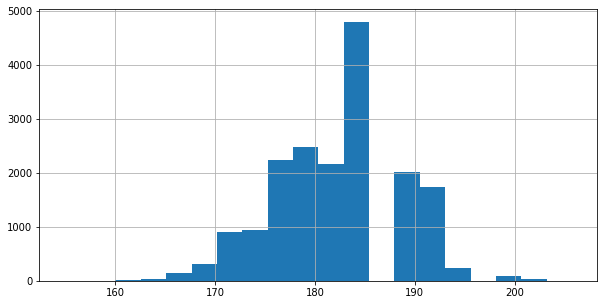

In [126]:
#Graph related to height of the players
fig = plt.figure(figsize = (10, 5))
df['Height'].hist(bins=20)
plt.show()

In [127]:
df['Value'] = df['Value'].replace({'\€':''}, regex = True)

In [128]:
df['Value'] = df['Value'].replace(r'[KM]+$', '', regex=True).astype(float)*df['Value'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)


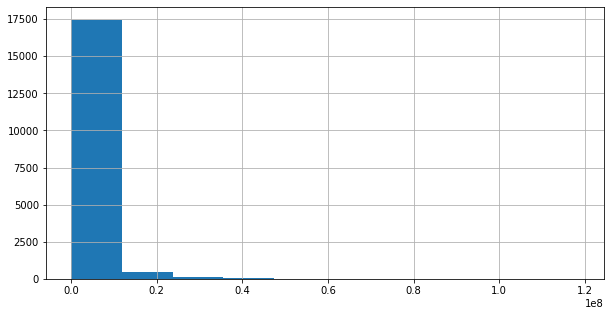

In [129]:
#histogram of Value
fig = plt.figure(figsize = (10, 5))
df['Value'].hist()
plt.show()

In [130]:
df['Wage'] = df['Wage'].replace({'\€':''}, regex = True)

In [131]:
df['Wage'] = df['Wage'].replace(r'[KM]+$', '', regex=True).astype(float)*df['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)


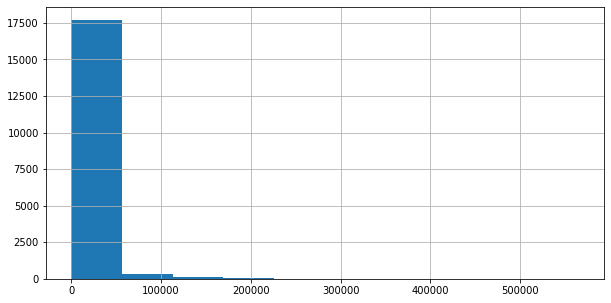

In [132]:
#histogram of wage
fig = plt.figure(figsize = (10, 5))
df['Wage'].hist()
plt.show()

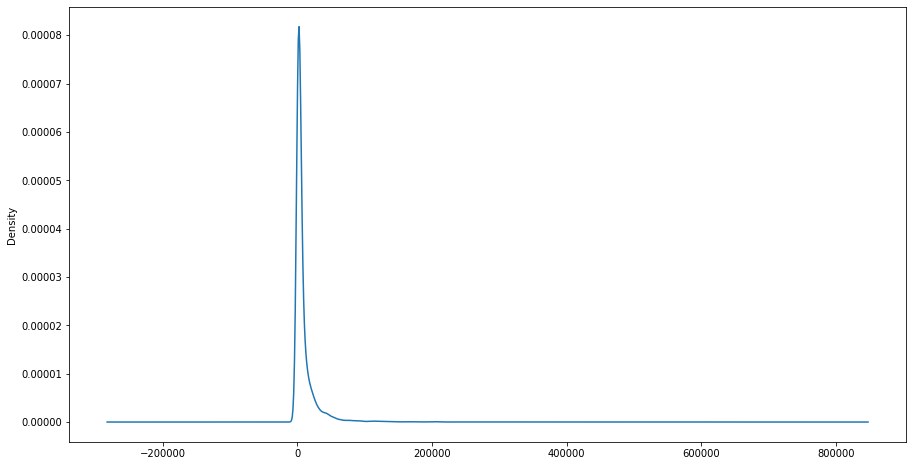

In [133]:
#kde plot on wage
df['Wage'].plot.kde()

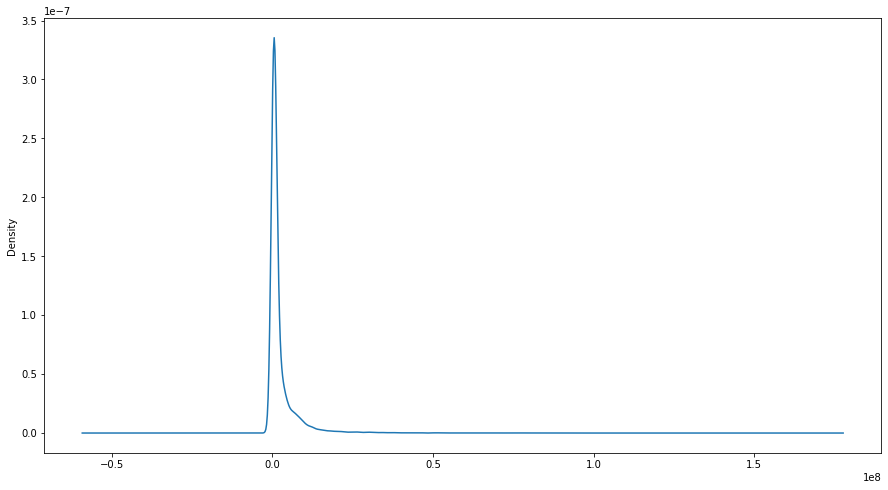

In [134]:
#kde plot on Value
df['Value'].plot.kde()

In [135]:
a = df.select_dtypes('number')
df[a.columns] = a.fillna(a.mean())
df['Club'].fillna('No Club', inplace = True)

df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


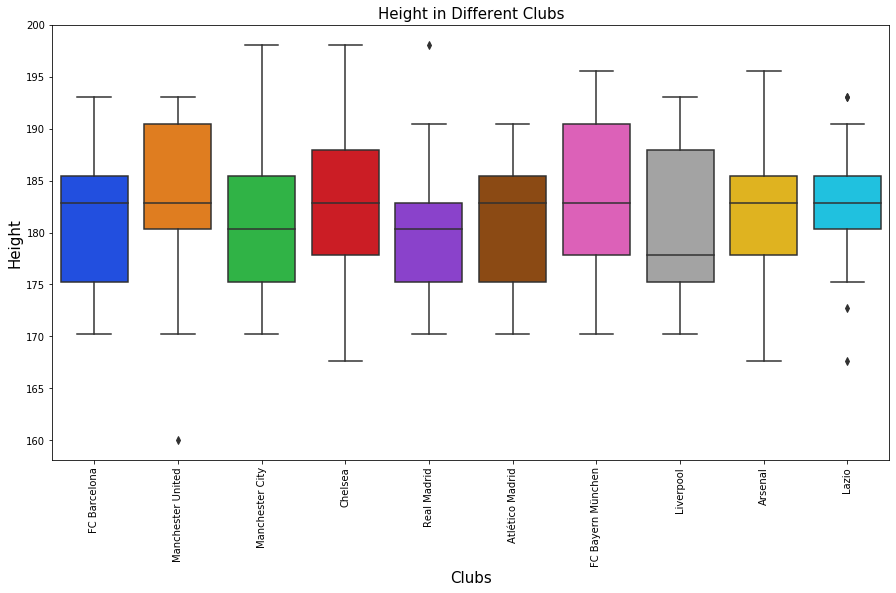

In [137]:
plt.rcParams['figure.figsize'] = (15, 8)
clubs = ('FC Bayern München','FC Barcelona', 'Real Madrid', 'Liverpool', 'Manchester City', 'Chelsea', 'Arsenal', 
             'Manchester United','Lazio','Atlético Madrid' )
data_clubs = df.loc[df['Club'].isin(clubs) & df['Height']]
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Height'], palette = 'bright')
ax.set_title(label = "Height in Different Clubs", fontsize = 15)
ax.set_xlabel(xlabel = 'Clubs', fontsize = 15)
ax.set_ylabel(ylabel = 'Height', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

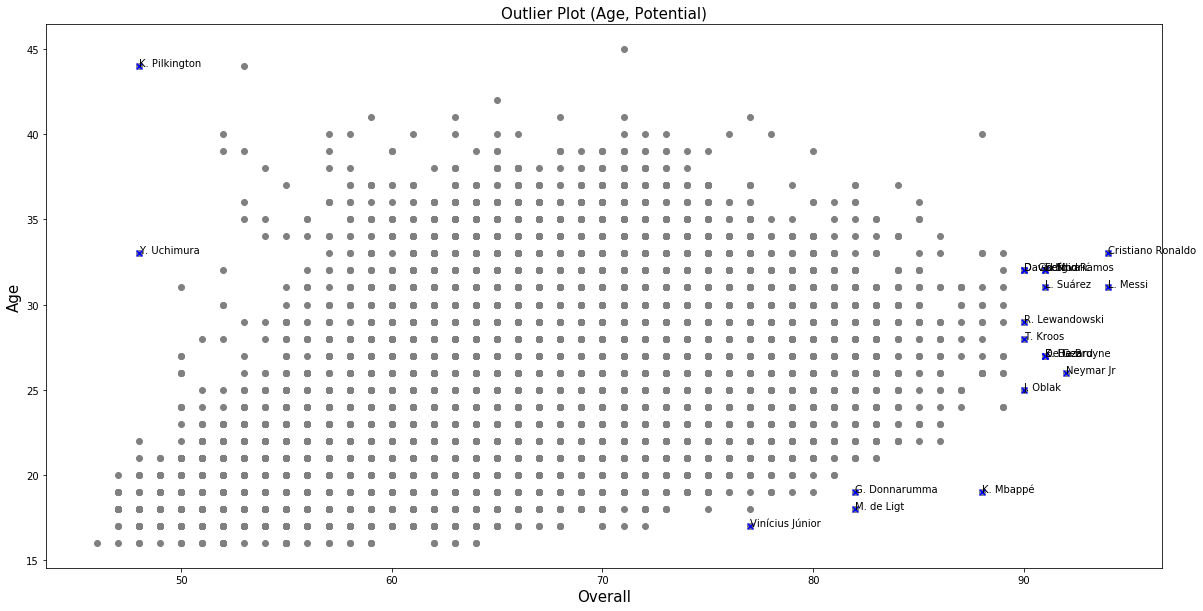

In [139]:
data = df.query('Overall >= 90 | (Age > 40 & Overall > 80) | (Age < 20 & Potential > 90) | (Overall < 50 & Age > 30)')
plt.rcParams['figure.figsize'] = (20, 10)

for i in range(0, data.shape[0]):
    plt.annotate(data.Name.tolist()[i], (data.Overall.tolist()[i], data.Age.tolist()[i]))

plt.title('Outlier Plot (Age, Potential)', fontsize = 15)
plt.xlabel('Overall', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.scatter(df['Overall'], df['Age'] , marker="o", color="Grey")
plt.scatter(data.Overall, data.Age, marker="x", color="Blue")
plt.show()

In [26]:
from sklearn.cluster import KMeans

In [61]:
df.drop(['Joined','Body Type','Real Face','Photo', 'Flag', 'Club Logo', 'Loaned From','Unnamed: 0', 'Jersey Number'], axis = 1, inplace=True)

In [62]:
df = df.select_dtypes(exclude = 'object')

In [76]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

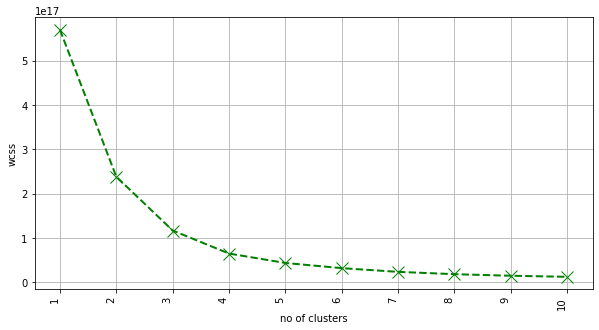

In [77]:
fig = plt.figure(figsize = (10, 5))
plt.plot(range(1,11),wcss, 'go--', linewidth=2, markersize=12, marker='x')
plt.setp(plt.gca().get_xticklabels(), rotation=90,horizontalalignment='right')
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.xticks(np.arange(1,11,1))
plt.grid()
plt.show()

In [73]:
x = df

In [74]:
X = np.array(x)

For n_clusters = 3 The average silhouette_score is : 0.8198665328559707
For n_clusters = 5 The average silhouette_score is : 0.7838987453503398
For n_clusters = 7 The average silhouette_score is : 0.7403311921374365


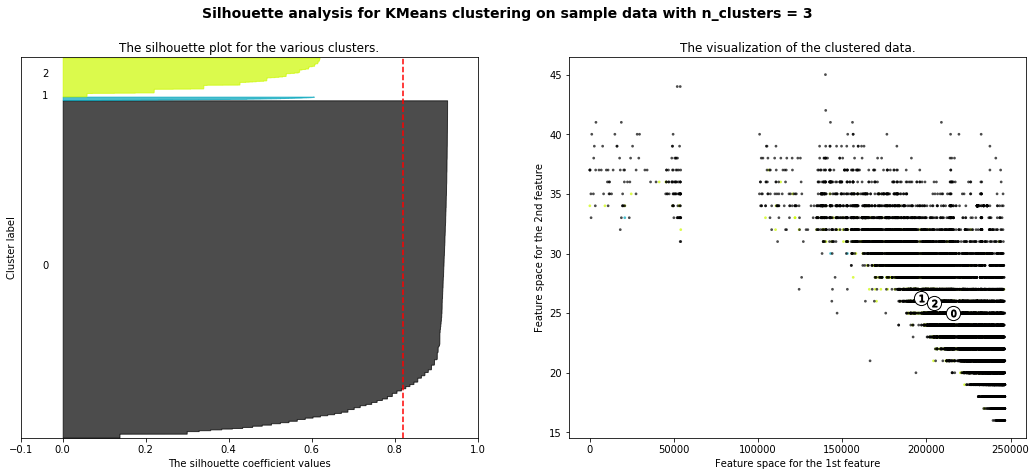

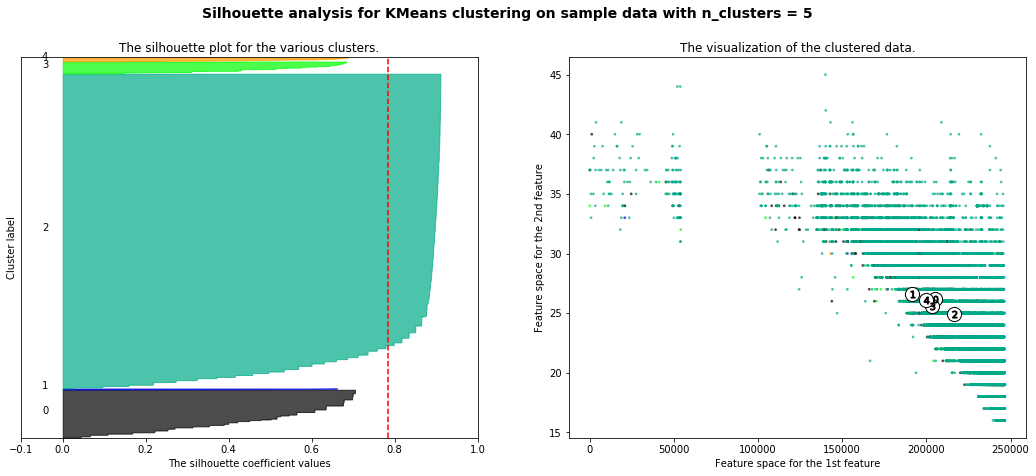

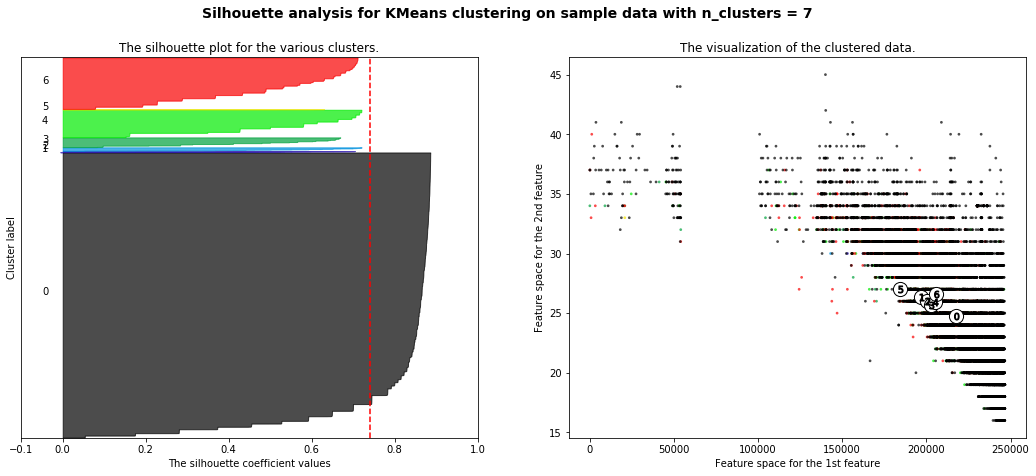

In [75]:
range_n_clusters = [3, 5, 7]
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## hierarchical clustering

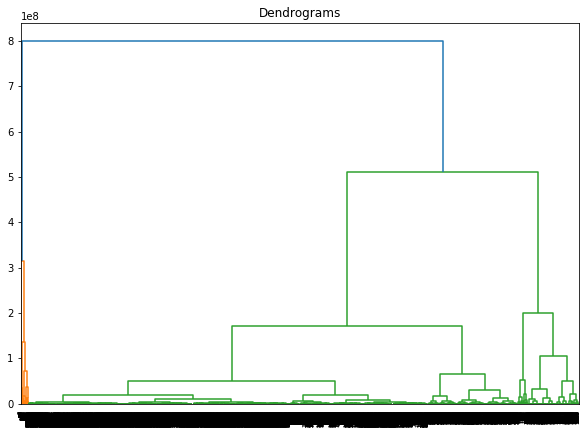

In [86]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(x,method="ward"))

In [103]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage = "ward")
label = cluster.fit_predict(x)

In [106]:
label

array([0, 0, 0, ..., 2, 2, 2])

In [104]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2).fit_transform(x)

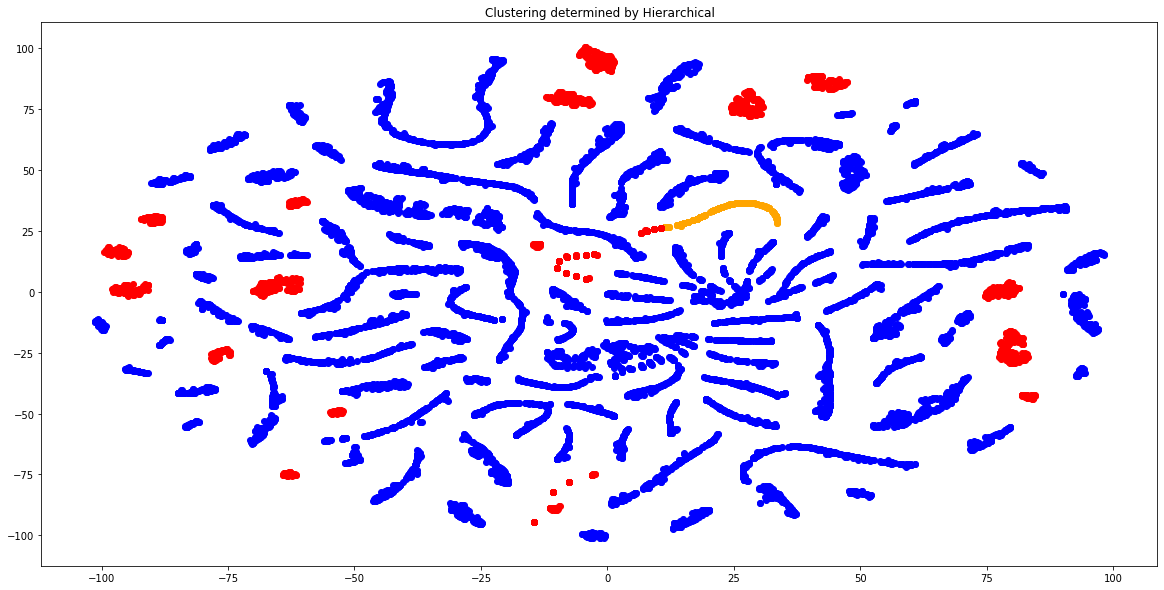

In [111]:
fig = plt.figure(figsize = (20,10))
plt.scatter(tsne[label == 0, 0], tsne[label == 0, 1], c = 'orange', marker = 'o')
plt.scatter(tsne[label == 1, 0], tsne[label == 1, 1], c = 'red', marker = 'o')
plt.scatter(tsne[label == 2, 0], tsne[label == 2, 1], c = 'blue', marker = 'o')
plt.title("Clustering determined by Hierarchical")
plt.show()

## DBScan

In [91]:
from sklearn.cluster import DBSCAN

In [94]:
dbscan = DBSCAN(eps = 30, min_samples=6)
dbscan.fit(x)

DBSCAN(eps=30, min_samples=6)

In [97]:
y_pred = dbscan.fit_predict(x)

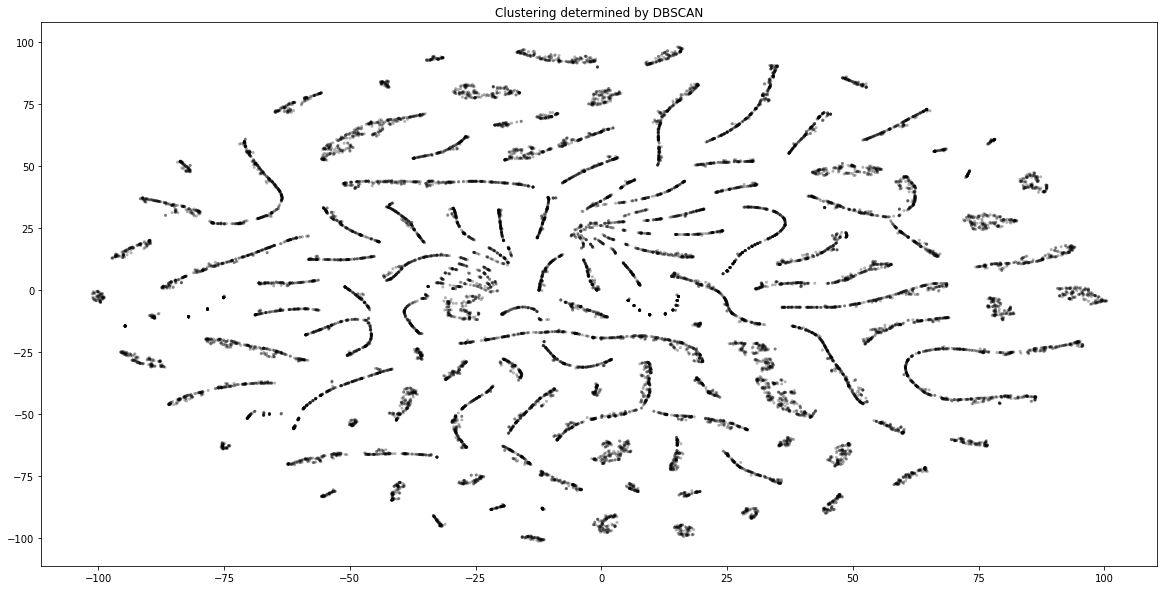

In [110]:
fig = plt.figure(figsize = (20,10))
colors = cm.nipy_spectral(y_pred.astype(float)/3)
plt.scatter(tsne[:, 1], tsne[:, 0], marker='.', lw=0, alpha=0.3, c=colors, edgecolor='k')
plt.title("Clustering determined by DBSCAN")
plt.show()